In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
! unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
! mkdir 'TSRD-Test Annotation'
! mkdir 'TSRD-Train Annotation'
! mkdir 'TSRD-Test'
! mkdir 'tsrd-train'

In [ ]:
! unzip 'TSRD-Test Annotation.zip' -d 'TSRD-Test Annotation'

Archive:  TSRD-Test Annotation.zip
  inflating: TSRD-Test Annotation/TsignRecgTest1994Annotation.txt  


In [ ]:
! unzip 'TSRD-Train Annotation.zip' -d 'TSRD-Train Annotation'

Archive:  TSRD-Train Annotation.zip
  inflating: TSRD-Train Annotation/TsignRecgTrain4170Annotation.txt  
  inflating: TSRD-Train Annotation/traffic_sign_recognition.ipynb  


In [ ]:
! unzip 'TSRD-Test.zip' -d 'TSRD-Test'

Archive:  TSRD-Test.zip
  inflating: TSRD-Test/057_0001_j.png  
  inflating: TSRD-Test/057_1_0001_1_j.png  
  inflating: TSRD-Test/057_1_0002_1_j.png  
  inflating: TSRD-Test/057_0002_j.png  
  inflating: TSRD-Test/000_0001_j.png  
  inflating: TSRD-Test/000_1_0001_1_j.png  
  inflating: TSRD-Test/000_1_0002_1_j.png  
 extracting: TSRD-Test/000_1_0003_1_j.png  
  inflating: TSRD-Test/000_1_0004_1_j.png  
  inflating: TSRD-Test/000_1_0005_1_j.png  
 extracting: TSRD-Test/000_1_0006_1_j.png  
 extracting: TSRD-Test/000_1_0007_1_j.png  
  inflating: TSRD-Test/000_0002_j.png  
 extracting: TSRD-Test/000_0003_j.png  
  inflating: TSRD-Test/000_0004_j.png  
  inflating: TSRD-Test/000_0005_j.png  
 extracting: TSRD-Test/000_0006_j.png  
 extracting: TSRD-Test/000_0007_j.png  
  inflating: TSRD-Test/001_0001_j.png  
  inflating: TSRD-Test/001_1_0001_1_j.png  
  inflating: TSRD-Test/001_1_0002_1_j.png  
  inflating: TSRD-Test/001_1_0003_1_j.png  
  inflating: TSRD-Test/001_1_0004_1_j.png  
  in

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import  PIL
from PIL import  ImageEnhance , ImageOps , Image
from matplotlib import pyplot
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
plt.rcParams["figure.figsize"] = (16,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

In [ ]:
data_china = pd.read_csv('TSRD-Train Annotation/TsignRecgTrain4170Annotation.txt', delimiter=';', na_values=".",header=None)

In [ ]:
data_china

,0,1,2,3,4,5,6,7
0,000_0001.png,134,128,19,7,120,117,0
1,000_0002.png,165,151,23,12,149,138,0
2,000_0003.png,128,122,22,14,116,105,0
3,000_0010.png,80,73,14,8,67,63,0
4,000_0011.png,186,174,36,15,155,157,0
...,...,...,...,...,...,...,...,...
4165,056_1_0050.png,106,107,15,23,89,87,56
4166,056_1_0051.png,148,147,20,33,123,122,56
4167,056_1_0052.png,218,182,32,26,185,161,56
4168,056_1_0053.png,100,101,12,18,88,85,56


In [ ]:
del data_china[8]

In [ ]:
data_china.head()

In [ ]:
data_china[7].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57])

In [ ]:
file_unique = []
for i in range(58):
  sudah_ada = 0
  for j in range(len(data_china[7])):
    
    if(data_china[7][j]==i and sudah_ada==0):
      file_unique.append(data_china[0][j])
      sudah_ada=1

In [ ]:
file_unique

['000_0001.png',
 '001_0001.png',
 '002_0001.png',
 '003_0001.png',
 '004_0001.png',
 '005_0001.png',
 '006_0001.png',
 '007_0001.png',
 '008_0001.png',
 '009_0001.png',
 '010_0001.png',
 '011_0001.png',
 '012_0001.png',
 '013_0001.png',
 '014_0001.png',
 '015_0001.png',
 '016_0001.png',
 '017_0001.png',
 '018_0001.png',
 '019_0001.png',
 '020_0001.png',
 '021_0001.png',
 '022_0001.png',
 '023_0001.png',
 '024_0001.png',
 '025_0001.png',
 '026_0001.png',
 '027_0001.png',
 '028_0001.png',
 '029_0001.png',
 '030_0001.png',
 '031_0001.png',
 '032_0001.png',
 '033_0001.png',
 '034_0001.png',
 '035_0001.png',
 '036_0001.png',
 '037_0001.png',
 '038_0001.png',
 '039_0001.png',
 '040_0001.png',
 '041_0002.png',
 '042_0001.png',
 '043_0001.png',
 '044_0001.png',
 '045_0001.png',
 '046_0001.png',
 '047_0001.png',
 '048_0001.png',
 '049_0001.png',
 '050_0001.png',
 '051_0001.png',
 '052_0001.png',
 '053_0001.png',
 '054_0001.png',
 '055_0001.png',
 '056_0001.png',
 '057_0001.png']

In [ ]:
len(file_unique)

58

In [ ]:
! unzip 'tsrd-train.zip' -d 'tsrd-train'

Archive:  tsrd-train.zip
  inflating: tsrd-train/056_0051.png  
  inflating: tsrd-train/056_0052.png  
 extracting: tsrd-train/056_0053.png  
 extracting: tsrd-train/056_0054.png  
  inflating: tsrd-train/057_0001.png  
  inflating: tsrd-train/057_1_0001.png  
  inflating: tsrd-train/057_1_0002.png  
  inflating: tsrd-train/057_1_0003_1_j.png  
  inflating: tsrd-train/057_0002.png  
  inflating: tsrd-train/057_0003_j.png  
 extracting: tsrd-train/000_0001.png  
 extracting: tsrd-train/000_1_0001.png  
  inflating: tsrd-train/000_1_0002.png  
 extracting: tsrd-train/000_1_0003.png  
 extracting: tsrd-train/000_1_0004.png  
 extracting: tsrd-train/000_1_0005.png  
 extracting: tsrd-train/000_1_0006.png  
 extracting: tsrd-train/000_1_0007.png  
 extracting: tsrd-train/000_1_0008.png  
 extracting: tsrd-train/000_1_0008_1_j.png  
 extracting: tsrd-train/000_1_0009.png  
 extracting: tsrd-train/000_1_0010.png  
  inflating: tsrd-train/000_1_0011.png  
  inflating: tsrd-train/000_1_0012.png

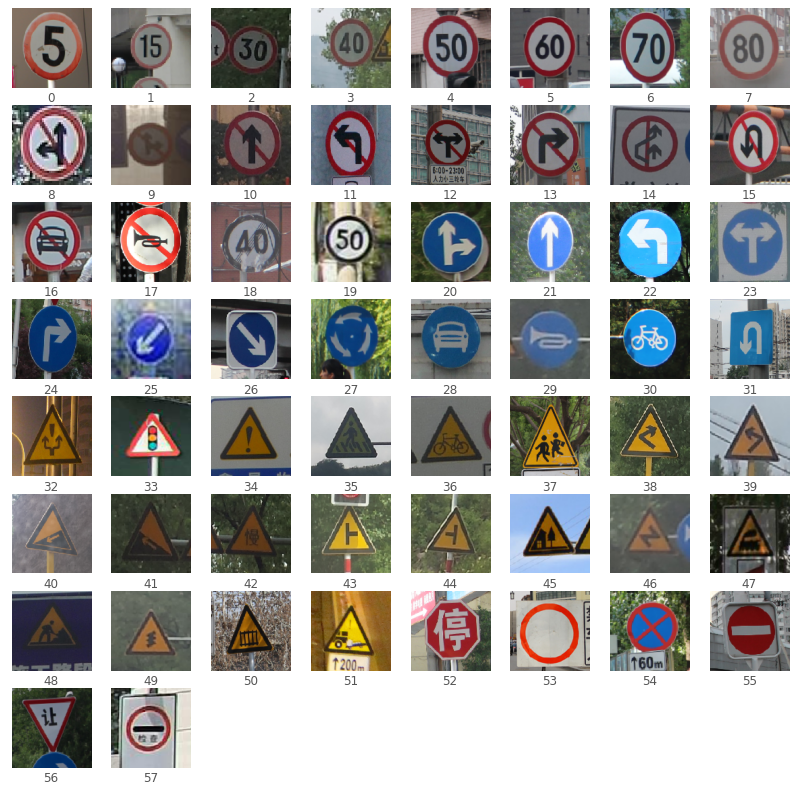

In [ ]:
# Visualizing all the different signs in the china dataset
plt.figure(figsize=(14,14))
index_sebelum = 0
for i in range(58):
    plt.subplot(8, 8, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    img = load_img('tsrd-train/'+str(file_unique[i]), target_size=(120, 120))
    plt.imshow(img)
    plt.xlabel(str(i))
plt.show()

In [ ]:
data_tambahan = pd.read_csv('Test.csv', delimiter=',', na_values=".")

In [ ]:
data_tambahan.head()

In [ ]:
print(data_tambahan['Path'][0])

In [ ]:
import shutil

files = [data_tambahan['Path'].tolist(),data_tambahan['ClassId'].tolist()]

print(files[0][0])
i=0
for f in data_tambahan['Path']:
  shutil.move(f, 'Train/'+str(files[1][i]))
  i+=1  

Test/00000.png


In [ ]:
! ls 'Test' 

In [ ]:
! ls 'Train/1'

In [ ]:
! mkdir 'new_mix_train_fixed'

In [ ]:
for i in range(43):
  os.makedirs("new_mix_train_fixed/"+str(i), exist_ok=True)

In [ ]:
id_china =[2,4,5,6,7,53,55,34,46,48,33,35,37,36,24,22,21,20,26,25,27]
id_jerman=[1,2,3,4,5,15,17,18,21,25,26,27,28,29,33,34,35,36,38,39,40]

In [ ]:
import shutil
for f in range(len(data_china[0])):
  counter=0
  for x in range(len(id_china)):
    if(data_china[7][f]==id_china[x] and counter<200):
      shutil.copy('tsrd-train/'+str(data_china[0][f]), 'new_mix_train_fixed/'+str(id_jerman[x]))
      counter+=1
      break

In [ ]:
for c in range(43):
  count = len(os.listdir('new_mix_train_fixed/'+str(c)))
  for f in (os.listdir('Train/'+str(c))):
    if(count<400):
      shutil.copy('Train/'+str(c)+'/'+f, 'new_mix_train_fixed/'+str(c))
      count+=1  
    else:
      break

In [ ]:
! ls new_mix_train_fixed/1 | wc -l

400


In [ ]:
min=len(os.listdir('Train/'+str(1)))
for i in range(43):
  if(min>len(os.listdir('Train/'+str(i)))):
    min=len(os.listdir('Train/'+str(i)))
print(min)

270


In [ ]:
train_path = 'Train'
IMG_HEIGHT = 30
IMG_WIDTH = 30

In [ ]:
# Number of Classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

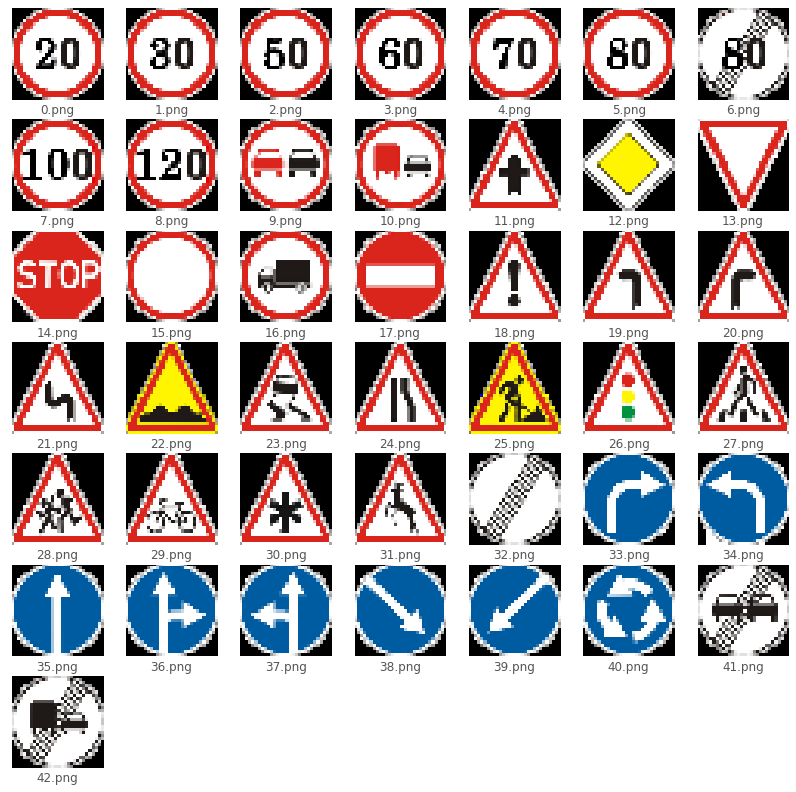

In [ ]:
# Visualizing all the different signs
plt.figure(figsize=(14,14))
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    img = load_img('Meta/'+str(i)+'.png', target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
    plt.xlabel(str(i)+'.png')
plt.show()

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Vehicle > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End of no passing vehicle > 3.5 tons' }

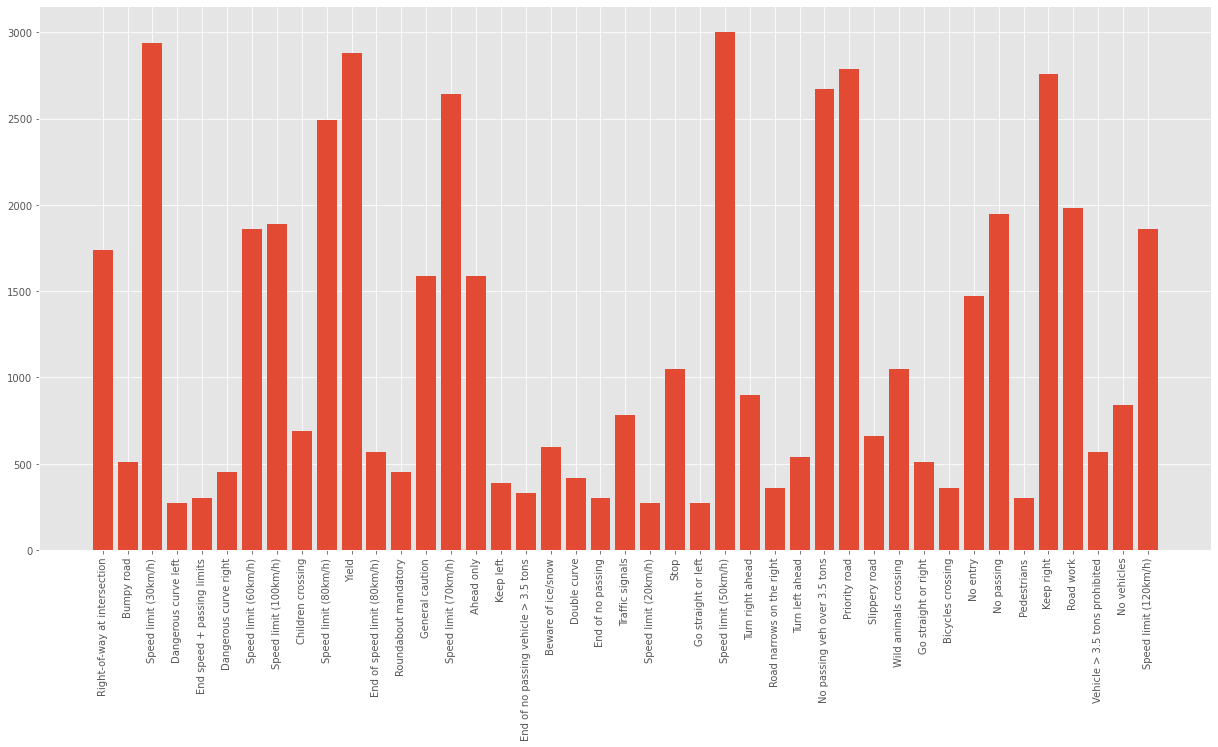

In [ ]:
folders = os.listdir(train_path)


train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])



plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
def load_data(data_dir):


    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
              img = load_img(os.path.join(categories, img), target_size=(IMG_HEIGHT, IMG_WIDTH))
              image = img_to_array(img)
              images.append(image)
              labels.append(category)
    
    return images, labels

In [ ]:
images, labels = load_data(train_path)

In [ ]:
len(images)

51839

In [ ]:
labels = to_categorical(labels)

In [ ]:
images2, labels2 = load_data('gdrive/MyDrive/Data Test Sign Traffic')

In [ ]:
labels2=to_categorical(labels2)

In [ ]:
images2 = np.array(images2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.3)

In [ ]:
x_train/=255
x_test/=255
print('x_train shape:',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])

x_train shape: (36287, 30, 30, 3)
Number of images in x_train 36287
Number of images in x_test 15552


In [ ]:
input_shape=( IMG_HEIGHT, IMG_WIDTH, 3)

In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [ ]:
history = model.fit(x_train, y_train,validation_split=0.3,epochs=20)

In [ ]:
#model.save('gdrive/MyDrive/ml_model_30_e40_mix')

In [ ]:
#np.save('gdrive/MyDrive/ml_history_30_e40_mix.npy',history.history)

In [ ]:
#history=np.load('gdrive/MyDrive/my_model_history/ml_history_30_e20_mix.npy',allow_pickle='TRUE').item()

In [ ]:
#model = keras.models.load_model('gdrive/MyDrive/ml_model_30_e20_mix')

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

486/486 [==============================] - 6s 12ms/step - loss: 0.2006 - accuracy: 0.9449
test set accuracy:  94.4894552230835


In [ ]:
loss, accuracy = model.evaluate(images2, labels2)

print('test set dari internet accuracy: ', accuracy * 100)

14/14 [==============================] - 0s 12ms/step - loss: 1425.6616 - accuracy: 0.4452
test set dari internet accuracy:  44.52380836009979


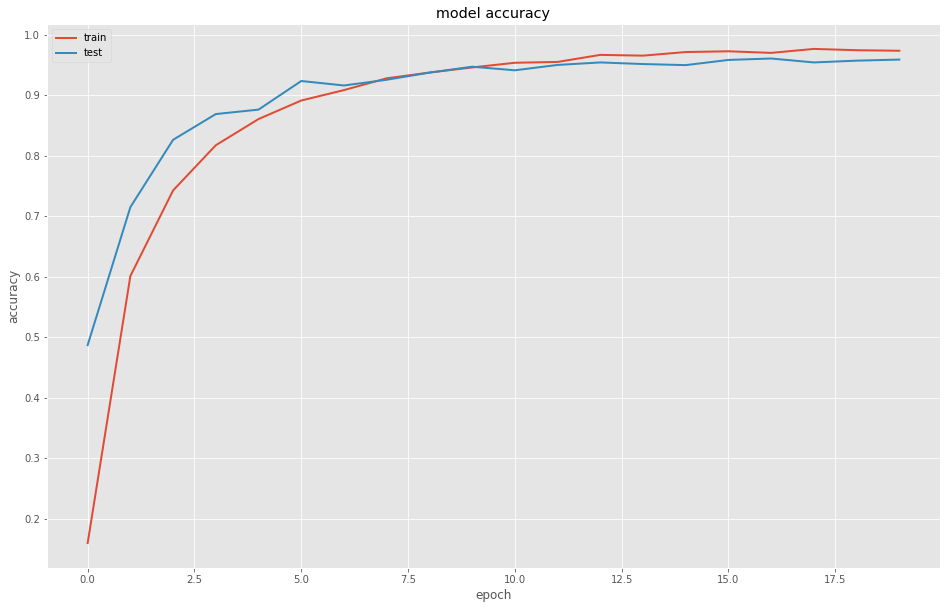

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
for i in range(36):
  pyplot.subplot(6,6,i+1)
  pyplot.imshow(x_test[i])

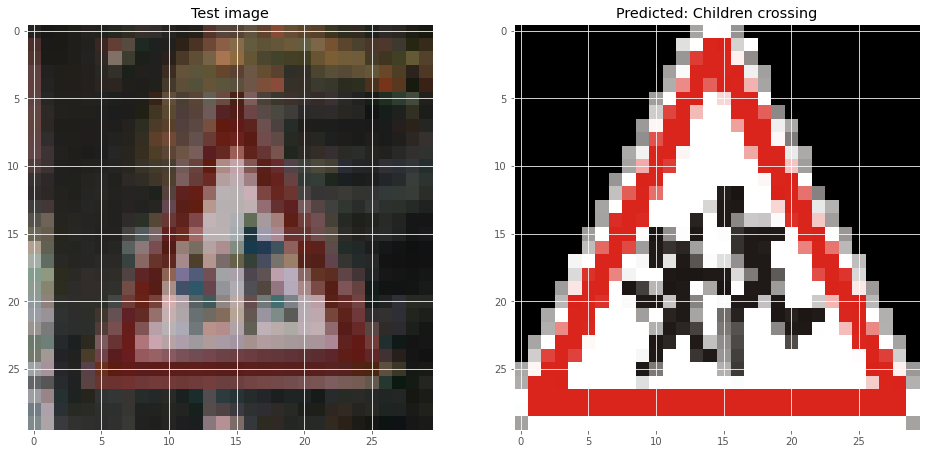

In [ ]:
image_index=0
n = np.array(x_test[image_index])
p = n.reshape(1, IMG_HEIGHT, IMG_WIDTH, 3)
index_classes=model.predict(p).argmax()
pred = classes[index_classes]

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.imshow(x_test[image_index])
plt.title("Test image")

plt.subplot(1, 2, 2) # index 2
plt.imshow(load_img('Meta/'+str(index_classes)+'.png', target_size=(IMG_WIDTH, IMG_HEIGHT)))
plt.title("Predicted: {}".format(pred))

plt.show()

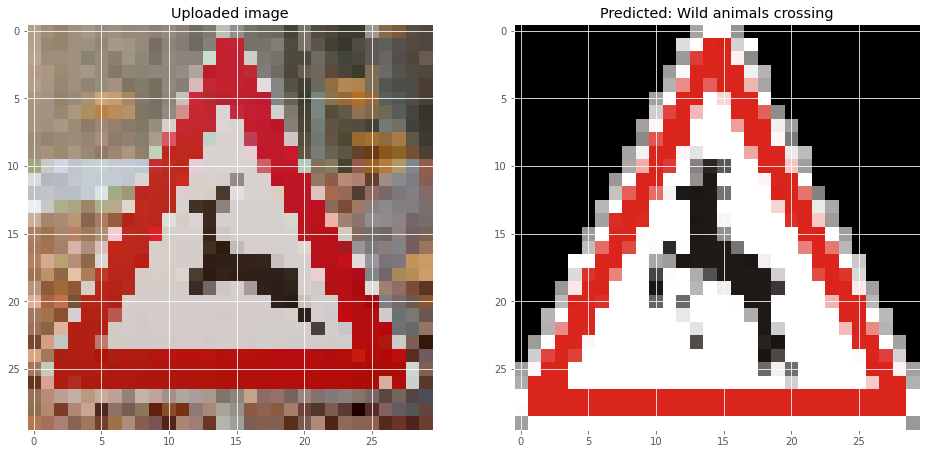

In [ ]:
uploaded_img = load_img('tes5.png', target_size=(IMG_HEIGHT, IMG_WIDTH))
uploaded_image = img_to_array(uploaded_img)
uploaded_image/=255

n = np.array(uploaded_image)
p = n.reshape(1, IMG_HEIGHT, IMG_WIDTH, 3)
index_classes=model.predict(p).argmax()
pred = classes[index_classes]

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.imshow(uploaded_image)
plt.title("Uploaded image")

plt.subplot(1, 2, 2) # index 2
plt.imshow(load_img('Meta/'+str(index_classes)+'.png', target_size=(IMG_WIDTH, IMG_HEIGHT)))
plt.title("Predicted: {}".format(pred))

plt.show()